### <font color = 'orange'>Utilizando distribuição de probabilidade para resolver perguntas de negócio<font>

In [1]:
# Imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm
from scipy.integrate import quad

### <font color = 'orange'> Distribuição Normal: Cenário 1 <font>

Considere o cenário de negócio onde uma empresa fabrica pneus. A vida útil desses pneus segue uma distribuição normal com média de 34.000km rodados e desvio padrão de 4.000km. A empresa deseja saber a probabilidade dos seus pneus fabricados durarem mais de 40.000km para fornecer uma garantia baseada nessa informação.

In [2]:
# Parâmetros da distribuição normal
media = 34000
desvio_padrao = 4000
durabilidade = 40000

# Calculando a probabilidade de um pneu durar mais de 40.000km
probabilidade = norm.sf(durabilidade, loc = media, scale = desvio_padrao)

print(f"Probabilidade: {probabilidade:.2%}")

Probabilidade: 6.68%


A probabilidade de um pneu durar mais de 40.000km é de 6.68%. Com esta informação, a empresa pode estruturar sua garantia, levando em conta a pequena porcentagem de pneus que excederá o limite de uso.

Será criado um gráfico para visualizar a distribuição de probabilidade.

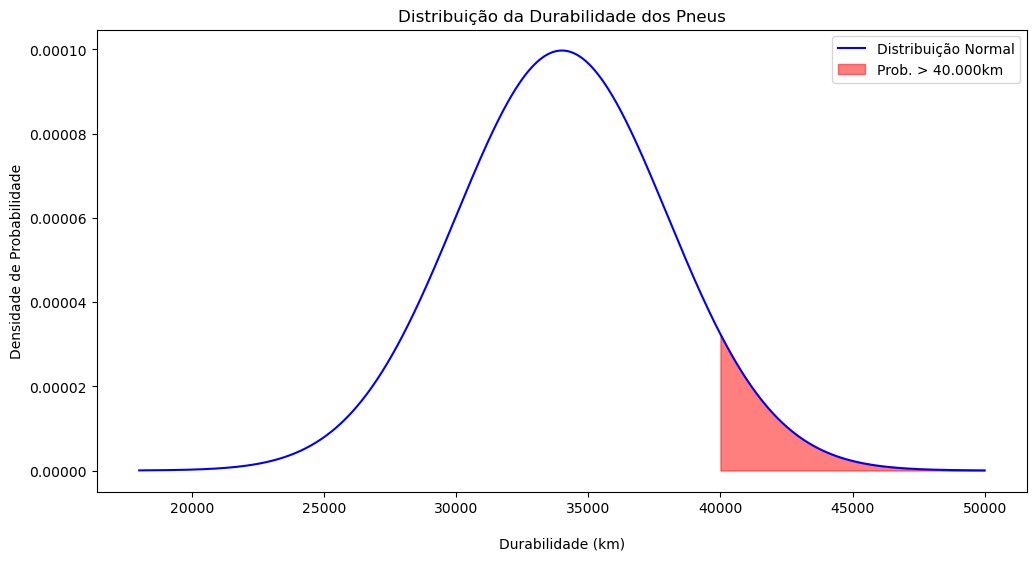

In [3]:
# Definindo os valores para o eixo x (uso dos pneus)
x = np.linspace(media - 4 * desvio_padrao, media + 4 * desvio_padrao, 1000)

# Calculando a função de densidade de probabilidade para os valores x
y = norm.pdf(x, loc = media, scale = desvio_padrao)

# Criando o plot
plt.figure(figsize = (12, 6))
plt.plot(x, y, label = 'Distribuição Normal', color = 'blue')

# Área representando a probabilidade de vida útil > 40.000km
x_shade = np.linspace(durabilidade, media + 4 * desvio_padrao, 1000)
y_shade = norm.pdf(x_shade, loc = media, scale = desvio_padrao)
plt.fill_between(x_shade, y_shade, color = 'red', alpha = 0.5, label = 'Prob. > 40.000km')

plt.title('Distribuição da Durabilidade dos Pneus')
plt.xlabel('\nDurabilidade (km)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

O gráfico ilustra a distribuição normal da durabilidade dos pneus, com a área em vermelho destacando a probabilidade dos pneus durarem mais de 40.000km. Como observado, esta área representa uma pequena fração da distribuição total, o que está alinhado com a probabilidade calculada de aproximadamente 6,68%. Este visual ajuda a entender graficamente como a durabilidade esperada se distribui e onde se situam os valores de interesse específicos para decisões de negócios, como a definição de termos de garantia.

### <font color = 'orange'> Distribuição Normal: Cenário 2 <font>

Vamos criar um exemplo onde estamos interessados em saber a probabilidade de um pneu, produzido pela mesma empresa, durar entre 30.000 e 38.000 kilometros, um intervalo que cai mais próximo do centro da distribuição.

Para encontrar essa probabilidade, podemos utilizar a função de distribuição cumulativa (CDF) da distribuição normal. A CDF nos dá a probabilidade de uma variável aleatória sob a distribuição normal ser menor ou igual a um certo valor. Assim, para calcular a probabilidade da durabilidade do pneu estar entre 30.000 e 38.000 kilometros, calcularemos a diferença entre a probabilidade da variável ser menor ou igual a 38.000 kilometros e a probabilidade de ser menor ou igual a 30.000 kilometros.

Vamos calcular e depois plotar a distribuição, destacando o intervalo de interesse.

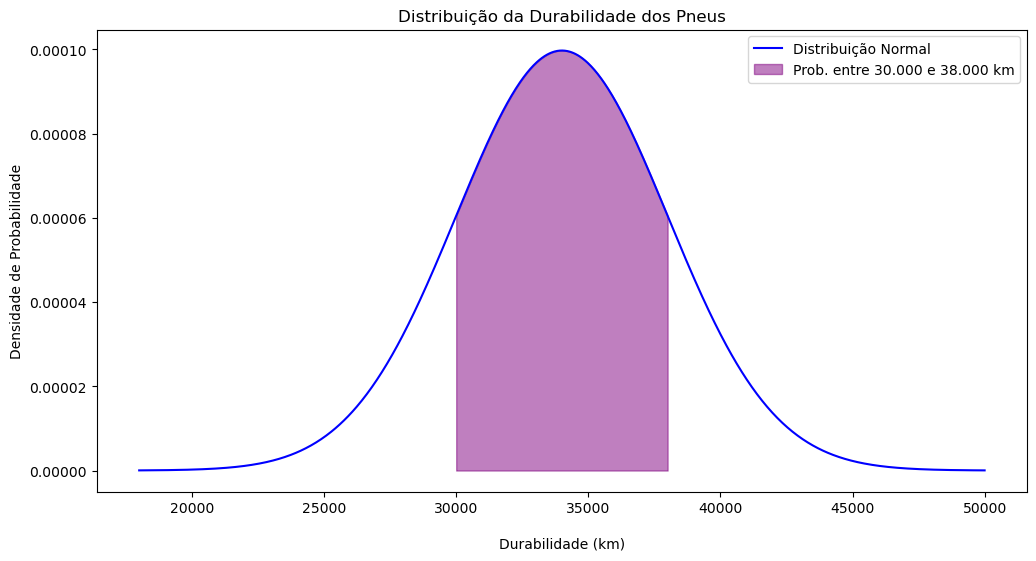

Probabilidade: 68.27%


In [4]:
# Definindo valores
valor_inferior = 30000
valor_superior = 38000

# Calculando as probabilidades para os limites inferior e superior do intervalo
probabilidade_inferior = norm.cdf(valor_inferior, loc = media, scale = desvio_padrao)
probabilidade_superior = norm.cdf(valor_superior, loc = media, scale = desvio_padrao)

# Probabilidade da durabilidade estar entre 30.000 e 38.000 km
probabilidade_intervalo = probabilidade_superior - probabilidade_inferior

# Criando o plot
plt.figure(figsize = (12, 6))
plt.plot(x, y, label = 'Distribuição Normal', color = 'blue')

# Área representando a probabilidade de durabilidade
x_shade_centro = np.linspace(valor_inferior, valor_superior, 1000)
y_shade_centro = norm.pdf(x_shade_centro, loc = media, scale = desvio_padrao)
plt.fill_between(x_shade_centro, 
                 y_shade_centro, 
                 color = 'purple', 
                 alpha = 0.5, 
                 label = 'Prob. entre 30.000 e 38.000 km')

plt.title('Distribuição da Durabilidade dos Pneus')
plt.xlabel('\nDurabilidade (km)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.show()

print(f"Probabilidade: {probabilidade_intervalo:.2%}")

A probabilidade de um pneu durar entre 30.000 e 38.000 km é aproximadamente 68,27%. O gráfico mostra a distribuição normal da durabilidade dos pneus, com a área em lilás destacando o intervalo de interesse. 

Esta região está localizada no centro da distribuição, representando uma probabilidade significativa, o que é esperado, considerando que esse intervalo está em torno da média da distribuição (34.000 km). Este exemplo ilustra como a maior parte da probabilidade se concentra em torno da média em uma distribuição normal, especialmente para intervalos simétricos em relação à média. 

### <font color = 'orange'> Distribuição Normal: Cenário 3 <font>

Para exemplificar um resultado que caia no lado esquerdo da curva de distribuição normal, vamos considerar a probabilidade de a duração do pneu ser meno que 25.000 km. Este valor está abaixo da média, então esperamos que a probabilidade correspondente esteja localizada no lado esquerdo da distribuição normal.

Para calcular essa probabilidade, podemos usar a função de distribuição cumulativa (CDF) novamente, que nos dá a probabilidade de uma variável aleatória ser menor ou igual a um valor específico. Neste caso, queremos a probabilidade de a variável aleatória (durabilidade do pneu) ser menor ou igual a 25.000 km.

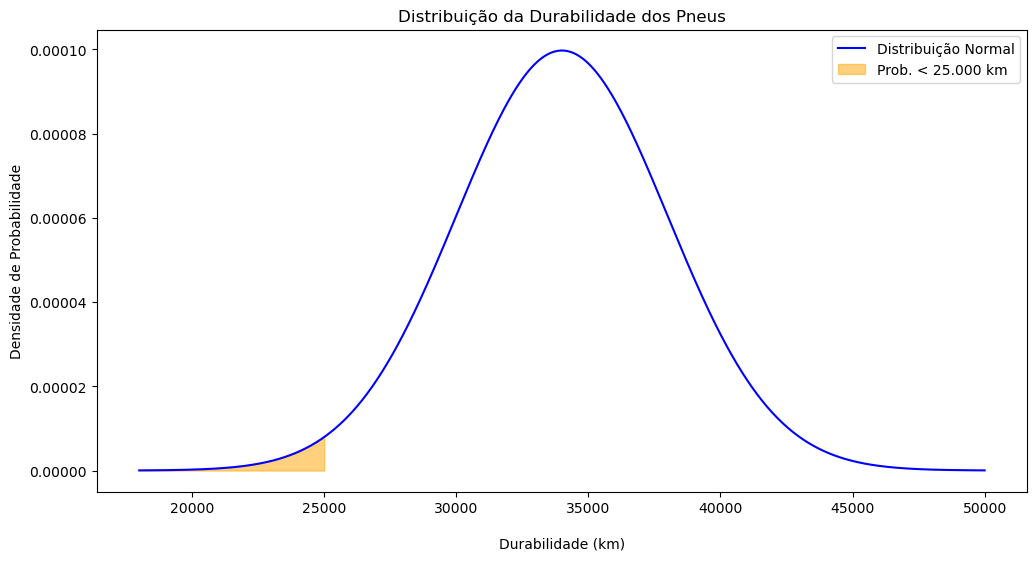

Probabilidade: 1.22%


In [5]:
# Durabilidade inferior
durabilidade_25000 = 25000

# Calculando a probabilidade de um pneu durar menos de 25.000km
probabilidade_menor_25000 = norm.cdf(durabilidade_25000, loc = media, scale = desvio_padrao)

# Criando o plot
plt.figure(figsize = (12, 6))
plt.plot(x, y, label = 'Distribuição Normal', color = 'blue')

# Área representando a probabilidade da durabilidade < 25.000
x_shade_esquerdo = np.linspace(media - 4 * desvio_padrao, durabilidade_25000, 1000)
y_shade_esquerdo = norm.pdf(x_shade_esquerdo, loc = media, scale = desvio_padrao)
plt.fill_between(x_shade_esquerdo, y_shade_esquerdo, color = 'orange', alpha = 0.5, label = 'Prob. < 25.000 km')

# Labels
plt.title('Distribuição da Durabilidade dos Pneus')
plt.xlabel('\nDurabilidade (km)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

print(f"Probabilidade: {probabilidade_menor_25000:.2%}")

A probabilidade de um pneu durar menos de 25.000 km é aproximadamente 1,22%. O gráfico ilustra a distribuição, com a área em laranja destacando o intervalo à esquerda da média, representando pneus com menor durabilidade. Este resultado, localizado no lado esquerdo da curva, reflete uma menor probabilidade, indicando que a maioria dos pneus tem uma durabilidade maior do que 25.000km. 

### <font color = 'orange'> Distribuição Normal - Regra Empírica <font>

A regra empírica, também conhecida como regra 68-95-99.7, descreve a distribuição de dados em uma curva normal (formato de sino). Ela afirma que aproximadamente:

- 68% dos dados caem dentro de um desvio padrão da média.
- 95% dos dados caem dentro de dois desvios padrões da média.
- 99.7% dos dados caem dentro de três desvios padrões da média.

Importância para análise da durabilidade de pneus:

Ao modelar a vida útil de um pneu com uma distribuição normal, a regra empírica ajuda a entender a variabilidade da durabilidade. Isso permite prever a vida útil da maioria dos pneus e identificar outliers (pneus com durabilidade excepcionalmente alta ou baixa).

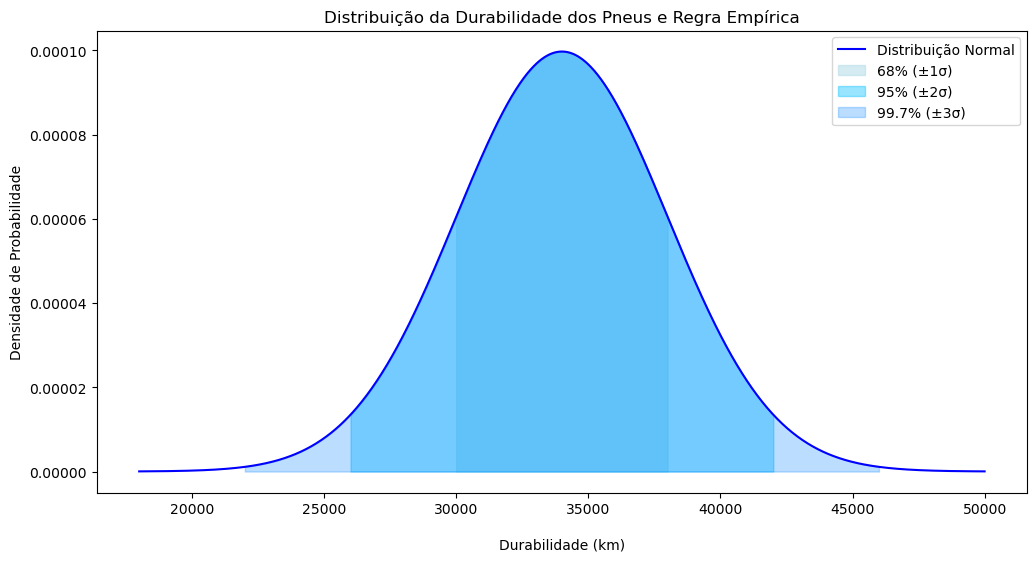

In [6]:
# Calculando os valores para as faixas dentro de 1, 2 e 3 desvios padrão da média
um_desvio    = [media - desvio_padrao, media + desvio_padrao]
dois_desvios = [media - 2 * desvio_padrao, media + 2 * desvio_padrao]
tres_desvios = [media - 3 * desvio_padrao, media + 3 * desvio_padrao]

# Criando o plot
plt.figure(figsize = (12, 6))
plt.plot(x, y, label = 'Distribuição Normal', color = 'blue')

# Área para 1 desvio padrão da média
x_shade_1 = np.linspace(um_desvio[0], um_desvio[1], 1000)
y_shade_1 = norm.pdf(x_shade_1, loc = media, scale = desvio_padrao)
plt.fill_between(x_shade_1, y_shade_1, color = 'lightblue', alpha = 0.5, label = '68% (±1σ)')

# Área para 2 desvios padrão da média
x_shade_2 = np.linspace(dois_desvios[0], dois_desvios[1], 1000)
y_shade_2 = norm.pdf(x_shade_2, loc = media, scale = desvio_padrao)
plt.fill_between(x_shade_2, y_shade_2, color = 'deepskyblue', alpha = 0.4, label = '95% (±2σ)')

# Área para 3 desvios padrão da média
x_shade_3 = np.linspace(tres_desvios[0], tres_desvios[1], 1000)
y_shade_3 = norm.pdf(x_shade_3, loc = media, scale = desvio_padrao)
plt.fill_between(x_shade_3, y_shade_3, color = 'dodgerblue', alpha = 0.3, label = '99.7% (±3σ)')

# Labels
plt.title('Distribuição da Durabilidade dos Pneus e Regra Empírica')
plt.xlabel('\nDurabilidade (km)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.show()

### <font color='orange'>Sistema e Versões dos Pacotes</font>

In [7]:
%reload_ext watermark
%watermark -v -m
%watermark --iversions

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 186 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

scipy     : 1.13.1
matplotlib: 3.8.4
numpy     : 1.26.4

